# Classification on the MNIST Dataset
## Framing the Problem
We are asked to build a model that can distinguish the handwritten digits in the MNIST dataset with an accuraccy of <ins>at least</ins> 97 percent.

The task we are trying to accomplish is supervised classification. It is supervised because each instance in the data comes with a label and classification because we are only trying to predict one of ten distinct values.

Performance will be measured using accuracy:
$$
Accuracy = \frac{number\ correct\ predictions}{total\ number\ of\ instances}
$$

Lastly, we are told that the KNeighborsClassifier seems to work well on the dataset. We are urged to atleast consider this classifier when building our model.
## Getting the Data
The MNIST dataset is a very famous dataset in machine learning. Due to how often this dataset is used in Machine Learning, Scikit-Learn offers a helper function to get the data- *fetch_openml()*. Let's fetch the data:

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame =False)
mnist.keys()

/home/keenan/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn often have a dictionary structure with these keys. Unsuprisingly, we are interested in the 'data' and 'target' keys. However, if we did not know much about the data; the 'DESCR' key offers a detailed description about this dataset. Let's save the data and labels as X and y respectively:

In [2]:
X, y = mnist['data'], mnist['target']

## Explore the Data
Let's explore the data a little bit. It's good to have an understanding of what kind of structures were working with. Perhaps some good things to figure out would be what type does our data come in and what is the size of our data? Before we mess with anything, let's save a copy of both X and y so we don't corrupt the originals.

In [3]:
X_train_raw, labels = X.copy(), y.copy()

print("The shape of our training data and testing data is {} and {},"
      "respectively.".format(X_train_raw.shape, labels.shape))

The shape of our training data and testing data is (70000, 784) and (70000,),respectively.


We see that our training data contains 70,000 instances each with 784 features. The 784 features in the MNIST dataset represent one pixel each of the 28 pixel by 28 pixel digital images in the dataset. Let's view a random instance from this dataset, say the 42nd instance.

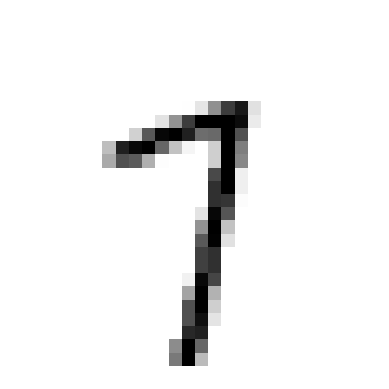

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def instance_to_image(some_number):
    some_number_image = some_number.reshape(28, 28)  # reshape array
    plt.imshow(some_number_image, cmap="binary")
    plt.axis("off")
    plt.show()

instance_to_image(X_train_raw[42])

This looks like a seven. We can verify which number this is by calling labels[42], which returns the label.

In [5]:
labels[42]

'7'

We were correct, it is a seven. But we also note that the returned label is a string. We might want to cast this as an integer; most Machine Learning models expect numbers.

In [6]:
import numpy as np

labels = labels.astype(np.uint8)

## Training a Multiclass Classifier
Because we are trying to classify each instance as an integer between zero and nine, inclusive, we are dealing with a multiclass classification problem. Before we begin training, we need to make sure that the classifiers we choose can handle multiple classes. The Random Forest, Naive Bayes, and K Nearest Neighbors classifiers can all, natively, handle multiclass classification. Two other classifiers we might be interested in are Stochastic Gradient Descent and Support Vector classifiers, but these distinguish between two classes. Luckily, Scikit-Learn remedies this problem by implementing a one vs. the rest or one vs. one scheme. Hence those classifiers may still be used for multiclass classsification.

Let's start by training these classifiers and getting an idea of how they perform by getting the cross_val_scores on the training set.
### Creating the Train and Test Sets
Before we continue, we need to create the train and test sets. The MNIST dataset has already been shuffled so we don't need to worry about doing it ourselves. It is also classic to take the first 60,000 instances for training and the last 10,000 for testing. We will abide by this tradition:

In [7]:
X_train, X_test, y_train, y_test = X_train_raw[:60000], X_train_raw[60000:], y[:60000], y[60000:]

### Random Forest
Now let's train a few classifiers and see how they perform. We will start by training a Random Forest classifier:

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier()
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9653, 0.9626, 0.9658])

Wow! The Random Forest Classifier is already achieving very high accuracy scores, above 96 percent with every fold. With some hyperparameter tuning we can surely get this above 97 percent. Before we get too far ahead of ourselves, we should check some other metrics to make sure nothing dubious is going on. Before that though, let's train another classifier.
### Naive Bayes
We have already found one classifier which shows promise, let's see if the Naive Bayes classifier can produce a similair results:

In [9]:
from sklearn.naive_bayes import GaussianNB

bayes_clf = GaussianNB()
cross_val_score(bayes_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.5592, 0.5603, 0.5572])

Oof. The Naive Bayes classifier performed much worse than the Random Forest Classifier. This might be for a number of reasons, but its likely that one of the assumptions that the Naive Bayes classifier makes is invalid for this data. It should be noted though that this is significantly better than random guessing. With random guessing we should expect ten percent accuracy. Let's hope that the K Nearest Neighbor classifier can perform better.
### K Nearest Neighbors
This is the classifier we we're recommended to try. Let's see if how it performs in our cross validation:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

The information we received about the K Nearest Neighbors classifier was good! This is our best classifier yet; just edging out the Random Forest classsifiers.
### Support Vector Classifier
This is our first classifier that cannot natively perform multiclass classification. We can still use it, however, because Scikit-Learn will implement a one versus one or one versus the rest scheme- *automatically*:

In [11]:
from sklearn.svm import SVC

sv_clf = SVC()
cross_val_score(sv_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.977 , 0.9738, 0.9739])

Suprisingly, though Support Vector Classifiers don't natively work on  multiclass classification problems, we have achieved our highest accuracy yet! Not only that but we've already beaten the 97 percent minimum that we required of ourselves.
### Stochastic Gradient Descent
This is ourr other classifier which does not natively handle multiclass classification. Let's see if it can go toe to toe with the Support Vector classifier:

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88355, 0.87355, 0.8538 ])

The Stochastic Gradient Descent classifier did do pretty well, but with how strongly some of our other classifiers performed we probably wont spend any time trying to improve this one. Let's move forward and investigate our three best models with some other measures.
## Performance Measures
So we've found some pretty strong classifiers. We will move forward with the three classifiers that performed the best on our initial cross-validation as measured by aaccuracy:
1. Support Vector Classifiier (> 97% accuracy)
2. K Nearest Neighbors (> 96 % accuracy
3. Random Forest Classifier (> 96% accuracy)

Let's try to dive a little deeper and see whats going on with these models, where we might improve, and if any of the models have sticking points or draw backs. One drawback already with our best perfroming classifier is that it takes significantly longer to train. Actually, KNN doesn't really train at all, but thats beside the point.

### Precision and Recall
Precision is the accuracy of the positive predictions. And Recall is the rate of positive instances detected by the classifier. Precision and recall can be expressed as:
$$
Precision = \frac{TP}{TP + FP}
$$
and
$$
Recall = \frac{TP}{TP + FN}
$$
where TP, FP, and FN stand for true positive, false positive, and false negative, respectively.

In [13]:
from sklearn.metrics import precision_score, recall_score

def print_precision_recall(classifier_name, true, predicted):
    print(classifier_name.upper())
    print("PRECISION:", precision_score(true, predicted, average="weighted"))
    print("RECALL:", recall_score(true, predicted, average="weighted"))

In [14]:
from sklearn.model_selection import cross_val_predict

svc_predicted = cross_val_predict(sv_clf, X_train, y_train, cv=3)
print_precision_recall("Support Vector Classifier", y_train, svc_predicted)

SUPPORT VECTOR CLASSIFIER
PRECISION: 0.9748918993843143
RECALL: 0.9749


In [15]:
forest_predicted = cross_val_predict(forest_clf, X_train, y_train, cv=3)
print_precision_recall("Random Forest Classifier", y_train, forest_predicted)

RANDOM FOREST CLASSIFIER
PRECISION: 0.9647351828584824
RECALL: 0.96475


In [16]:
knn_predicted = cross_val_predict(knn_clf, X_train, y_train, cv=3)
print_precision_recall("K Nearest Neighbors", y_train, knn_predicted)

K NEAREST NEIGHBORS
PRECISION: 0.9676755320854337
RECALL: 0.9674166666666667


The recall and precision scores tell the same story as the accuracy. K Nearest Neighbors just edges out the Random Forest classifier as the second best classifier and the Support Vector classifier is still performing the best. We could comparee these by plotting a Receiver Operating Characteristic (ROC) curve and then measuring the are under the curve, but all these classifiers are performing so similairly, we wouldn't be able to descern anything from the graph and the areas would be very similair. Instead lets illuustrate a confusion matrix. This will also show us where each classifier is having the most trouble.
### Confusion Matrix
A confusion matrix will tell us how many times an instance of class x is classified as class y. We might expect a lot of fives and threes to be confused with one another, because these numbers look similair. Note: columns denote the predicted class while rows denote the actual class.

In [17]:
def illustrate_confusion_matrix(mx_title, conf_mx):
    print(mx_title.upper())
    
    row_sum = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sum
    np.fill_diagonal(norm_conf_mx, 0)  # make diagonal black
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()

SUPPORT VECTOR CLASSIFIER


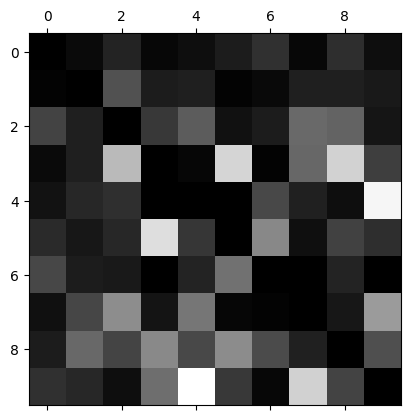

K NEAREST NEIGHBORS


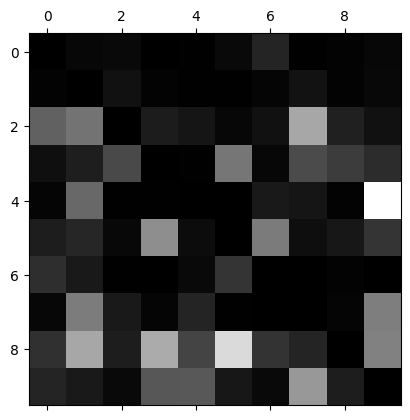

In [18]:
from sklearn.metrics import confusion_matrix

svc_mat = confusion_matrix(y_train, svc_predicted)
knn_mat = confusion_matrix(y_train, knn_predicted)

illustrate_confusion_matrix("Support Vector Classifier", svc_mat)
illustrate_confusion_matrix("K Nearest Neighbors", knn_mat)

It appears that the Support Vector Classifier struggles most with nines and fours. We can understand intuiitively why this might be true. Nines and fours do kind of resemble eachother. It also has problems with nines and sevens, likely for the same reason. Similairly fives and threes. Interestingly it often misclassifies threes as twos but seldom twos for threes. It also seems to have trouble when the true label is eight.

K Nearest Neighbors looks much more assymetric. It often predicts a four to be a nine, but often doesn't predict nines to be fours. The only most symmetric parts are confusion about fives and threes. K nearest Neighbors also seems to struggle in classifying eights.

Let's do some data manipulation and see if we can further improve these scores.
## Data Manipulation and Augmentation
Let's start by just standardizing the data. We can do this with Scikiit-Learns Standard Scaler.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train.astype(np.float64))

Now that the data has been standardized, let's test our two classifiers to see if they improve with this manipulation:

In [20]:
cross_val_score(knn_clf, X_scaled, y_train, cv=3, scoring="accuracy")

array([0.9376, 0.9411, 0.9424])

Our K Nearest Neighbor classifier actually performed worse. Let's see if the same is true for the Support Vector classifier. We might need to consider a different data manipulation.

In [21]:
cross_val_score(sv_clf, X_scaled, y_train, cv=3, scoring="accuracy")

array([0.9596, 0.9602, 0.961 ])

It looks like this manipulation was not good. Its likely because we are attempting to force  our pixel values into a distribution that is not representative of our data. Perhaps a better plan would just be to scale the data down so that it fits on the interval from zero to one. Let's try this:

In [22]:
from sklearn.preprocessing import normalize

X_normalized = normalize(X_train.astype(np.float64))

Now that the data has been normalized to fit a zero to one scale, basically all values have been divided by 255 (assuming 255 is the highest pixel intensity in the dataset). Let's see how our models perform:

In [23]:
cross_val_score(knn_clf, X_normalized, y_train, cv=3, scoring="accuracy")

array([0.97255, 0.97015, 0.97185])

It appears our data liked this manipulation more. In fact, this is the first time we have reached an average accuracy greater than 97 percent with the K Nearest Neighbors classifier. Let's see how our Support Vector classifier does with this same training set:

In [24]:
cross_val_score(sv_clf, X_normalized, y_train, cv=3, scoring="accuracy")

array([0.97715, 0.9762 , 0.97665])

This normalization of the data does not seem to have hurt or helped our scores. Let's move forward with a more sophisticated data operation.
### Data Augmentation
Data augmentation is the process of artificially growing the training set by manipulating existing data, then adding the manipulated data to the training set as if it were new data. Here, we will perform data augmentation by taking each image in the dataset, shifting it right, left, up or down by one pixel. Let's right a function to do this.

We'll start with a function that shifts the images up one pixel. We can do this by deleting the first 28 elements in the array (the top row of the image), copying the last 28 pixels and then appending them to the array. We copy the last 28 pixels to essentially extend the image by whatever color pixel was at the edge.

In [25]:
def shift_image_up(train_set):
    for image in train_set:
        image = image[28:]
        image = np.append(image, image[-28:])
    return train_set

In [26]:
X_augmented_up = shift_image_up(X_train.copy())
X_augmented = np.append(X_train, X_augmented_up, axis=0)

Now, we have doubled the size of our training set, so we also need to make labels for this training set. This eill be easy. Just append the list of labels to itself. We can print the shape of the augmented training set hust to make sure everything went to plan. The shape should be (120000, 784).

In [27]:
y_train_augmented = np.append(y_train, y_train)
X_augmented.shape

(120000, 784)

Now, lets train a classifier on this set and see if the accuracy improves. We will use a K Nearest Neighbor classifier. We choose to continue with the KNN classifier because it is only marginally worse, but it runs in a matter of seconds rather than minutes.

In [28]:
cross_val_score(knn_clf, X_augmented, y_train_augmented, cv=3, scoring="accuracy")

array([0.9805  , 0.9811  , 0.981375])

Look at that, we have achieved our highest accuracy yet. We can see that augmenting our data can be useful. Let's perform one more augmentation, but this time shift everything down by one pixel. And dont forget to update the labels.

In [29]:
def shift_image_down(train_set):
    for image in train_set:
        image = image[:-28]
        image = np.append(image[:28], image)
    return train_set

In [30]:
X_augmented_down = shift_image_down(X_train.copy())
X_augmented = np.append(X_augmented, X_augmented_down, axis=0)

y_train_augmented = np.append(y_train_augmented, y_train)

X_augmented.shape

(180000, 784)

In [31]:
cross_val_score(knn_clf, X_augmented, y_train_augmented, cv=3, scoring="accuracy")

array([0.98716667, 0.98716667, 0.98716667])

Once again, we have increased our average accuracy. It looks like it might even be possible for us to get to 99 percent accuracy with enough effort. Let's move on to hyperparameter tuning, maybe we can increase our accuracy without adding more data.
## Tuning our Model
From here forward, we will only be working with the K Nearest Neighbor classifier, this is simply due to its speed. Continuing with the Support Vector classifiers is completely possible, but with limited time and computing power, this option seems better.

We will be using Scikit-Learns GridSearchCV tool for tuning the hyperparameters. All we have to do is tell it which hyperparameters we want to tweak and which values we would like to try. The parameters we want to tweak are the weights, algorithm, and leaf_size (when possible) hyperparameters.

EDIT: I tried using GridSearchCV to test many hyperparameters, but after running all night it hadn't finished. I then ran about a third of the parameters and got the same result. Now I just want to see if the model performs better with distance weights rather than uniform weights.

In [34]:
knn_distance_weighted = KNeighborsClassifier(weights = 'distance')
cross_val_score(knn_clf, X_augmented, y_train_augmented, cv=2, scoring="accuracy")

array([0.98323333, 0.98373333])

Now let's see if it performs any better by checking more neighbors. Currently it checks 5 neighbors. Let's double this to ten.

In [35]:
knn_distance_weighted = KNeighborsClassifier(n_neighbors=10, weights='distance')
cross_val_score(knn_clf, X_augmented, y_train_augmented, cv=2, scoring="accuracy")

array([0.98323333, 0.98373333])